In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import lightgbm as lgb
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from featurewiz import featurewiz


Imported featurewiz: advanced feature engg and selection library. Version=0.0.42
output = featurewiz(dataname, target, corr_limit=0.70,
                    verbose=2, sep=',', header=0, test_data='',
                    feature_engg='', category_encoders='')
Create new features via 'feature_engg' flag : ['interactions','groupby','target']
                                


In [ ]:
df = pd.read_csv('final_data.csv')
df_home = df.loc[(df['location']==2)]
X = df_home.drop(columns=['win','location'])
y = df_home['win']
X = df_home.drop(columns=['win'])
y = df_home['win']

In [50]:
from sklearn.model_selection import cross_val_score
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [121]:
from sklearn.model_selection import cross_val_score
k_features = []
direction = []
features = []
score = []
accuracy = []
for k in range (5,20):
    LR = LogisticRegression(C=0.01,penalty='l2',solver='liblinear')
    sfs1 = sfs(LR, k_features=k, forward=True, verbose=0, scoring='neg_mean_squared_error')
    sfs1 = sfs1.fit(X, y)
    feat_names = list(sfs1.k_feature_names_)
    LR.fit(X_train,y_train)
    
    accuracyCV = cross_val_score(LR, X[feat_names], y, scoring='accuracy', cv = 10)
    print(f'Accuracy of logistic regression classifier on test set (Forward {k}): ' + str(np.mean(accuracyCV))
    k_features.append(k)
    direction.append('forwards')
    features.append(feat_names)
    score.append(np.mean(accuracyCV))

        


Accuracy of logistic regression classifier on test set (Forward 5): 0.6668163448585541
Accuracy of logistic regression classifier on test set (Forward 6): 0.6618769645262685
Accuracy of logistic regression classifier on test set (Forward 7): 0.652896273013022
Accuracy of logistic regression classifier on test set (Forward 8): 0.6551414458913336
Accuracy of logistic regression classifier on test set (Forward 9): 0.6690615177368657
Accuracy of logistic regression classifier on test set (Forward 10): 0.6600808262236192
Accuracy of logistic regression classifier on test set (Forward 11): 0.6748989672204759
Accuracy of logistic regression classifier on test set (Forward 12): 0.6573866187696452
Accuracy of logistic regression classifier on test set (Forward 13): 0.6668163448585541
Accuracy of logistic regression classifier on test set (Forward 14): 0.6663673102828918
Accuracy of logistic regression classifier on test set (Forward 15): 0.6654692411315671
Accuracy of logistic regression classi

In [123]:
forward = list(zip(k_features,direction,features,score))

In [5]:
k_features = []
direction = []
features = []
score = []
accuracy = []
for k in range (5,20):
    LR = LogisticRegression(C=0.01,penalty='l2',solver='liblinear')
    sfs1 = sfs(LR, k_features=k, forward=False, verbose=0, scoring='neg_mean_squared_error')
    sfs1 = sfs1.fit(X, y)
    feat_names = list(sfs1.k_feature_names_)
    LR.fit(X_train,y_train)
    
    
    accuracyCV = cross_val_score(LR, X[feat_names], y, scoring='accuracy', cv = 10)
    print(f'Accuracy of logistic regression classifier on test set (Backwards {k}): ' + str(np.mean(accuracyCV))
    k_features.append(k)
    direction.append('forwards')
    features.append(feat_names)
    score.append(np.mean(accuracyCV))

Accuracy of logistic regression classifier on test set (Backward 5): 0.6789402784014369
Accuracy of logistic regression classifier on test set (Backward 6): 0.6443646160754378
Accuracy of logistic regression classifier on test set (Backward 7): 0.6650202065559048
Accuracy of logistic regression classifier on test set (Backward 8): 0.6690615177368657
Accuracy of logistic regression classifier on test set (Backward 9): 0.6573866187696452
Accuracy of logistic regression classifier on test set (Backward 10): 0.6591827570722946
Accuracy of logistic regression classifier on test set (Backward 11): 0.6573866187696452
Accuracy of logistic regression classifier on test set (Backward 12): 0.6457117198024248
Accuracy of logistic regression classifier on test set (Backward 13): 0.6587337224966322
Accuracy of logistic regression classifier on test set (Backward 14): 0.6497530309833858
Accuracy of logistic regression classifier on test set (Backward 15): 0.6641221374045801
Accuracy of logistic regre

In [65]:
fts = ['HHI', 'HHI_assists', 'G_PTS', 'F_PTS', 'C_PTS', 'starter_PTS',
       'starter_MIN', 'TO_rate', 'EFG', 'FT_rate', 'OREB_rate', 'DREB_rate',
       'opp_TO_rate', 'opp_EFG', 'opp_FT_rate', 'opp_DREB_rate',
       'play_percent', 'opp_play_percent', 'opp_OREB_rate']
imp = [-0.02753832, -0.02591515, -0.03008433,  0.00237201,  0.04950093,
         0.02639412,  0.0448585 , -0.1895288 ,  0.17424204,  0.07200856,
         0.10168204,  0.05929719,  0.1118098 , -0.16503256, -0.03398813,
        -0.10168204,  0.04226501, -0.1049049 , -0.05929719]
final_overall = list(zip(fts,imp))
ovr_res = pd.DataFrame(final_overall,columns=['features','importance'])
ovr_res.to_csv('overall_res.csv',index=False)

In [100]:
backward = list(zip(k_features,direction,features,score))

In [20]:
feats = ['TO_rate', 'FT_rate', 'OREB_rate', 'DREB_rate', 'opp_TO_rate', 'play_percent', 'opp_play_percent']
impo = [-0.13205073,  0.07734382,  0.11683448,  0.04558147,  0.02920256,
         0.2618741 , -0.27547867]
data = list(zip(feats,impo))
final = pd.DataFrame(data,columns=['features','importance'])

In [21]:
final

,features,importance
0,TO_rate,-0.132051
1,FT_rate,0.077344
2,OREB_rate,0.116834
3,DREB_rate,0.045581
4,opp_TO_rate,0.029203
5,play_percent,0.261874
6,opp_play_percent,-0.275479


In [22]:
final.to_csv('LR_best.csv',index=False)

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
k_features = []
direction = []
scores = []
feats = []
accuracy = []
for i in range(5,19):
    rfe = RFE(estimator=LogisticRegression(C=0.01,penalty='l2',solver='liblinear'), n_features_to_select=i)
    rfe.fit(X,y)
    model = LogisticRegression(C=0.01,penalty='l2',solver='liblinear')
    support = rfe.support_
    feature_names = X_train.columns
    rfe_feats = feature_names[support]
    # fit the model on all available data
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    LR = LogisticRegression(C=0.01,penalty='l2',solver='liblinear')
    X_train, X_test, y_train, y_test = train_test_split(X[feat_names],y, test_size=.2)
    LR.fit(X_train,y_train)
    y_pred = LR.predict(X_test)
    
    n_scores = cross_val_score(model, X[rfe_feats], y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    print(f'Features: {i}, accuracy: {np.mean(n_scores)}, score: {LR.score(X_test, y_test)}')
    k_features.append(i)
    direction.append('rfe')
    scores.append(np.mean(n_scores))
    feats.append(rfe_feats)

rfe_res = list(zip(k_features,direction,feats,scores))

Features: 5, accuracy: 0.6634342354084233, score: 0.6551414458913336
Features: 6, accuracy: 0.6644219906948134, score: 0.6663673102828918
Features: 7, accuracy: 0.6636436101715055, score: 0.6690615177368657
Features: 8, accuracy: 0.6629548080650686, score: 0.6731028289178267
Features: 9, accuracy: 0.6650201121289498, score: 0.6690615177368657
Features: 10, accuracy: 0.6654998620836498, score: 0.6713066906151773
Features: 11, accuracy: 0.6659490177291064, score: 0.6659182757072295
Features: 12, accuracy: 0.6659489639605489, score: 0.6627750336775932
Features: 13, accuracy: 0.6646316074164046, score: 0.6686124831612034
Features: 14, accuracy: 0.6660691098023845, score: 0.6578356533453076
Features: 15, accuracy: 0.6662186132766397, score: 0.6731028289178267
Features: 16, accuracy: 0.6656796103715246, score: 0.6775931746744499
Features: 17, accuracy: 0.6655300531287117, score: 0.6690615177368657
Features: 18, accuracy: 0.66561990038837, score: 0.6672653794342165


In [131]:
bwd = pd.DataFrame(data=backward[:],columns=['k_features','direction','features','score'])
fwd = pd.DataFrame(data=forward[:],columns=['k_features','direction','features','score'])
rfe_results = pd.DataFrame(data=rfe_res[:],columns=['k_features','direction','features','score'])
pca_results = pd.DataFrame(data=pca_data[:],columns=['k_features','direction','features','score'])
results = pd.concat([bwd,fwd,rfe_results,pca_results])

In [ ]:
k_features = []
direction = []
scores = []
feats = []

for i in range(1,20):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X)

    # Get the transformed dataset
    X_pca = pd.DataFrame(X_pca)
    X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, 
                                                            shuffle=True, random_state=2)


    clf = LogisticRegression(C=0.01,penalty='l2',solver='liblinear')

    # Train the model
    clf.fit(X_train_pca, y_train)
    # Measure accuracy
    n_scores = cross_val_score(clf, X_pca[rfe_feats], y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    k_features.append(i)
    direction.append('pca')
    scores.append(np.round(np.mean(n_scores))
    feats.append('all')

In [95]:
pca_data = list(zip(k_features,direction,feats,scores))

In [129]:
pca_data

[(1, 'pca', 'all', 0.650202),
 (2, 'pca', 'all', 0.663224),
 (3, 'pca', 'all', 0.664122),
 (4, 'pca', 'all', 0.663224),
 (5, 'pca', 'all', 0.659632),
 (6, 'pca', 'all', 0.661877),
 (7, 'pca', 'all', 0.66053),
 (8, 'pca', 'all', 0.660979),
 (9, 'pca', 'all', 0.66502),
 (10, 'pca', 'all', 0.66502),
 (11, 'pca', 'all', 0.66502),
 (12, 'pca', 'all', 0.668163),
 (13, 'pca', 'all', 0.668163),
 (14, 'pca', 'all', 0.668163),
 (15, 'pca', 'all', 0.666816),
 (16, 'pca', 'all', 0.665918),
 (17, 'pca', 'all', 0.665918),
 (18, 'pca', 'all', 0.665918),
 (19, 'pca', 'all', 0.665918)]

In [133]:
results.to_csv('Logistic_Regression_Results.csv')

Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
Loading train data...
Shape of your Data Set loaded: (11134, 21)
Loading test data...
    Filename is an empty string or file not able to be loaded
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    20 Predictors classified...
        1 variable(s) will be ignored since they are ID or low-information variables
No GPU active on this device
    Running XGBoost using CPU parameters
Removing 1 columns from further processing since ID or low information variables
    After removing redundant variables from further processing, features left = 19
#### Single_Label Binary_Classification Feature Selection Started ####
Searching for highly correlated variables from 19 variables using SULOV method
#####  SULOV : Searching for Uncorrelated List Of Variables (takes time...) ############
There are n

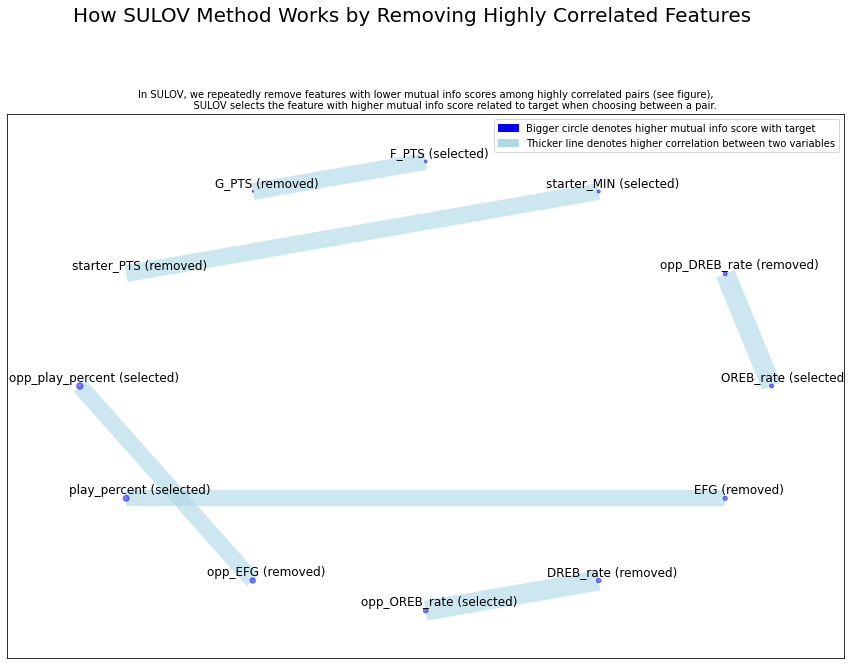

    Adding 0 categorical variables to reduced numeric variables  of 13
############## F E A T U R E   S E L E C T I O N  ####################
Current number of predictors = 13 
    Finding Important Features using Boosted Trees algorithm...
        using 13 variables...
        using 10 variables...
        using 7 variables...
        using 4 variables...
        using 1 variables...
Selected 11 important features from your dataset
    Time taken (in seconds) = 8
Returning list of 11 important features and dataframe.


In [4]:
target = 'win'
feats = featurewiz(df_home, target)

In [20]:
from sklearn.model_selection import cross_val_score
fts = []
direction = []
k_features = []
accuracy = []
LR = LogisticRegression(C=0.01,penalty='l2',solver='liblinear')
feats = ['opp_play_percent', 'play_percent', 'TO_rate', 'OREB_rate', 'FT_rate', 'opp_TO_rate', 'opp_OREB_rate', 'starter_MIN', 'C_PTS', 'F_PTS', 'opp_FT_rate']
X = df_home[feats]
y = df_home[target]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)
LR.fit(X_train,y_train)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
fts.append(feats)
k_features.append(len(feats))
direction.append('featurewiz')
accuracy.append(np.mean(n_scores))



0.6780422092501123


In [24]:
fwiz = list(zip(k_features,direction,fts,accuracy))
fw_res = pd.DataFrame(data=fwiz[:],columns=['k_features','direction','features','score'])

In [ ]:
bwd = pd.DataFrame(data=backward[:],columns=['k_features','direction','features','score'])

In [21]:
results = pd.read_csv('Logistic_Regression_Results.csv')

In [25]:
results = results.drop(columns=['Unnamed: 0'])
results = pd.concat([results,fw_res])

In [28]:
results.to_csv('LR_results.csv',index=False)